<a href="https://colab.research.google.com/github/PaulaDiz/C-LCULO-NUM-RICO-II/blob/main/Metodo_de_Adams_Bashforth_de_3_pasos_expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Método de Adams-Bashforth de 3 pasos explícito

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos la función f(t, y) = y' = f(t, y)

def f(t, y):
  return y - t**2 + 1 # Ecuación diferencial ejemplo

# Solución exacta para comparar

def solucion_exacta(t):
  return t**2 + 2*t + 1 - 0.5*np.exp(t)

In [3]:
# Método de Adams-Bashforth de 3 pasos

def adams_bashforth_3pasos(f, t0, y0, h, n):
  t = np.zeros(n+1)
  y = np.zeros(n+1)
  t[0] = t0
  y[0] = y0

  # Primeros dos pasos usando el método de Runge-Kutta de orden 4

  for i in range(2):
    k1 = f(t[i], y[i])
    k2 = f(t[i] + 0.5*h, y[i] + 0.5*h*k1)
    k3 = f(t[i] + 0.5*h, y[i] + 0.5*h*k2)
    k4 = f(t[i] + h, y[i] + h*k3)
    t[i+1] = t[i] + h
    y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

  # Aplicamos Adams-Bashforth de 3 pasos a partir del tercer punto

  for i in range(2, n):
    t[i+1] = t[i] + h
    y[i+1] = y[i] + h*(23/12*f(t[i], y[i]) - 16/12*f(t[i-1], y[i-1]) +
    5/12*f(t[i-2], y[i-2]))

  return t, y

In [4]:
# Parámetros

t0 = 0 # Tiempo inicial
y0 = 0.5 # Condición inicial: y(0) = 0.5
h = 0.5 # Tamaño de paso
n = int(2/h) # Número de pasos, hasta t = 2

In [5]:
# Ejecutamos el método Adams-Bashforth

t_ab, y_ab = adams_bashforth_3pasos(f, t0, y0, h, n)

# Solución exacta para comparar

t_exact = np.linspace(t0, 2, 100)
y_exact = solucion_exacta(t_exact)

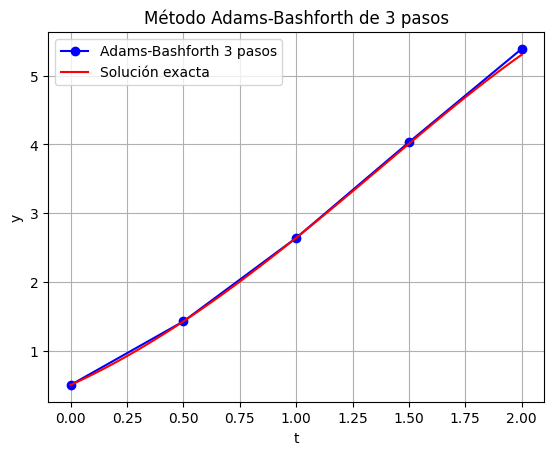

In [6]:
# Graficamos los resultados

plt.plot(t_ab, y_ab, 'bo-', label='Adams-Bashforth 3 pasos')
plt.plot(t_exact, y_exact, 'r', label='Solución exacta')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Método Adams-Bashforth de 3 pasos')
plt.grid(True)
plt.show()
